# Visualization with Python



<img src="https://www.python.org/static/img/python-logo.png" alt="yogen" style="width: 200px; float: right;"/>
<br>
<br>
<br>
<img src="http://yogen.io/assets/logo.svg" alt="yogen" style="width: 200px; float: right;"/>

# `matplotlib`

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

## Matplotlib basic plotting

A MATLAB-like plotting framework: [`pyplot`](https://matplotlib.org/api/pyplot_api.html). 

Also known as the "state-machine environment" because we can call methods of a global state machine and they will affect the appropiate objects.

### Lines

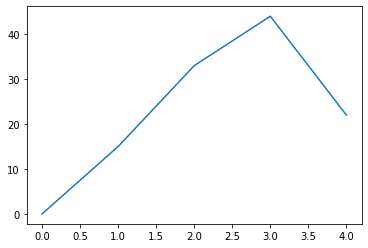

In [5]:
plt.plot([0,1,2,3,4], [0, 15, 33, 44, 22])

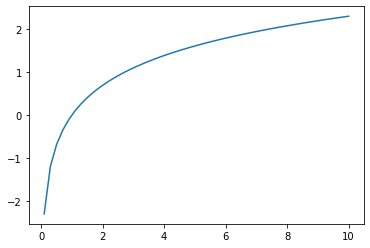

In [10]:
xs = np.linspace(0.1, 10)
ys = np.log(xs)
plt.plot(xs,ys)

#### Exercise

Plot the logistic function 


$$f(x) = \frac{e^x}{1 + e^x}$$

Between -7 and 7


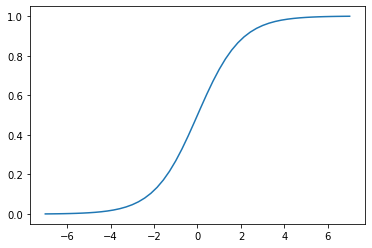

In [11]:
xs = np.linspace(-7,7)
ys = np.exp(xs)/(1+np.exp(xs))
plt.plot(xs, ys)

### Scatter plots

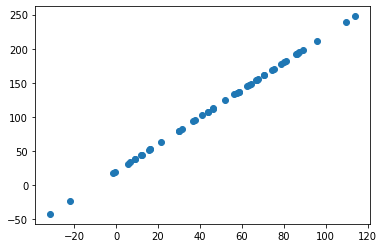

In [13]:
xs = np.random.randn(50)*30 + 50
ys = 2*xs + 20
plt.scatter(xs, ys)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


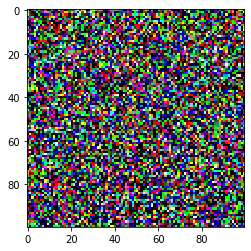

In [19]:
plt.imshow(np.random.randn(100,100,3))

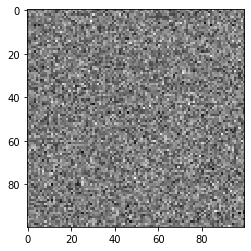

In [81]:
plt.imshow(np.random.randn(100,100), cmap='gray')

Here we are using a random noise ("jitter"
) added over the (perfectly following $f(x) = 2x + 20$) Y2 Series in order to get some noisier, more real-looking generated data.


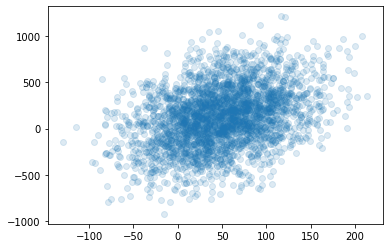

In [36]:
xs = np.random.randn(3000)*50 +50
ys = 2*xs +20 +np.random.randn(3000)*300
plt.scatter(xs, ys, alpha=.15)

This is what happens if you make a line plot of unsorted data:

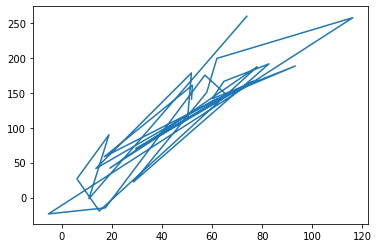

In [25]:
plt.plot(xs,ys)

In [26]:
xs

array([ 73.88531238,  10.90849891,  18.89594638,   6.11503022,
        15.02976711,  77.99109823,  19.23360242,  50.27500018,
        51.80276453,  13.66041958,  60.27829121,  93.23947803,
        60.07838296,  64.71972235,  82.70896601,  28.65781511,
        57.88120008,  61.94350666, 116.14518403,  -5.24962931,
        17.47453396,  30.30668278,  57.13599923,  65.76545988,
        29.5678677 ,  41.25985412,  76.34261754,  17.06059254,
        52.15692196,  51.83914183])

### Bar plots

Do not confuse with histograms

([<matplotlib.axis.XTick at 0x7f770d6214d0>,
 <a list of 3 Text xticklabel objects>)

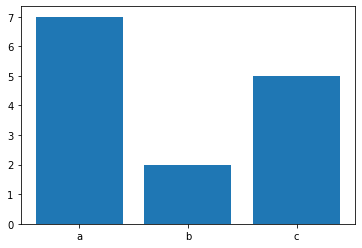

In [39]:
plt.bar(range(3), [7,2,5])
plt.xticks(range(3), ['a', 'b', 'c'])

## The object-oriented interface

Essential for finer control.

The recommended procedure is to use pyplot to create figures and the object-oriented interface for plotting. 

We need to know the somewhat confusing [matplotlib terminology](http://matplotlib.org/faq/usage_faq.html#parts-of-a-figure)

![Anatomy of a Matplotlib Figure](http://matplotlib.org/_images/anatomy1.png)

#### Figure

A whole figure which may contain several Axes. It communicates with the `Canvas` for us.

#### Axes vs Axis

An `Axes` (yes, it looks like a plural noun but it's not, necessarily) is a single panel of a figure. An `Axes` contains generally 2, but sometimes 3, `Axis`. It is the object type we'll spend most time interacting with.

`Axis` objects represent the lines in the x and y (and z in the case of 3D plots) dimensions. With them you can control ticks and ticklabels.

#### Artists

There are two types of Artists: primitives and containers. The primitives represent the standard graphical objects we want to paint onto our canvas: Line2D, Rectangle, Text, AxesImage, etc., and the containers are places to put them (Axis, Axes and Figure).

https://matplotlib.org/users/artists.html

### Interlude: the recommended interface for our plotting functions

From [the matplotlib FAQ](http://matplotlib.org/faq/usage_faq.html):

```python
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    
    out = ax.plot(data1, data2, **param_dict)
    return out
```

## `add_axes()`, `add_subplot`, and `subplots()` 

We can add Axes to a Figure by calling its add_axes method.

A subplot is just an Axes that we place within an imaginary grid.

For even finer control we can use [GridSpec](http://matplotlib.org/api/gridspec_api.html)

### `add_axes()`

See https://matplotlib.org/users/artists.html

Total flexibility in placing the Axes: we specify `[left, bottom, width, height]` in 0-1 relative figure coordinates.

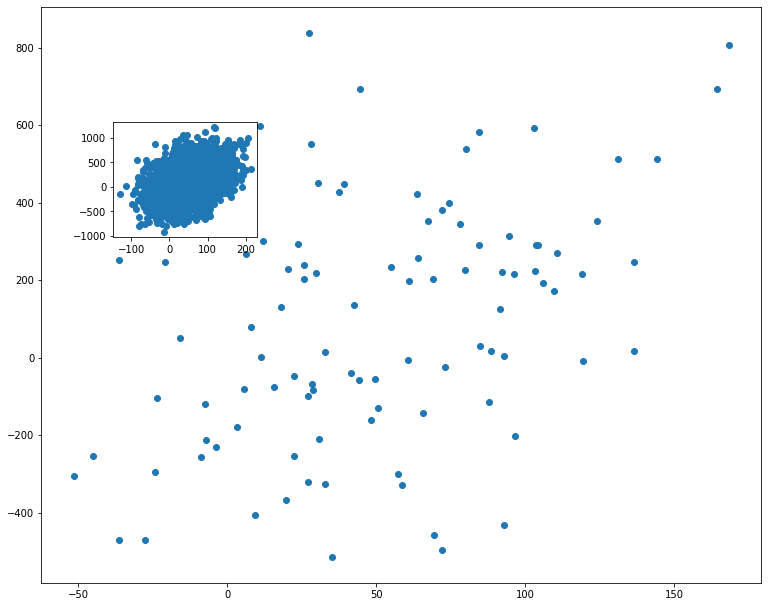

In [52]:
f = plt.figure(figsize=(10,8))
axes1 = f.add_axes([0,0,1,1])
axes2 = f.add_axes([0.10,0.6,0.2,0.2])

axes1.scatter(xs[:100],ys[:100])
axes2.scatter(xs,ys)

### Subplots

We can add them with either `figure.add_subplot()` or create a figure with its subplots directly by calling `plt.subplots()`

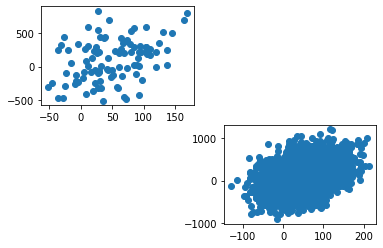

In [54]:
f = plt.figure(figsize=(6,4))
axes1 = f.add_subplot(2,2,1)
axes2 = f.add_subplot(2,2,4)

axes1.scatter(xs[:100],ys[:100])
axes2.scatter(xs,ys)

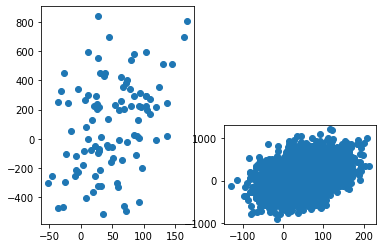

In [55]:
f = plt.figure(figsize=(6,4))
axes1 = f.add_subplot(1, 2,1)
axes2 = f.add_subplot(2,2,4)

axes1.scatter(xs[:100],ys[:100])
axes2.scatter(xs,ys)

### `plt.subplots()`

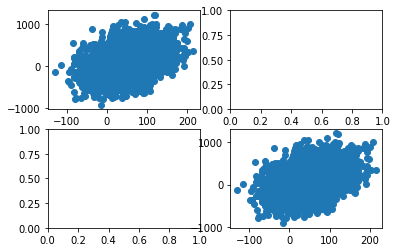

In [70]:
f, ax = plt.subplots(2,2)
ax[0,0].scatter(xs,ys)
ax[1,1].scatter(xs,ys)

### Sharing axis

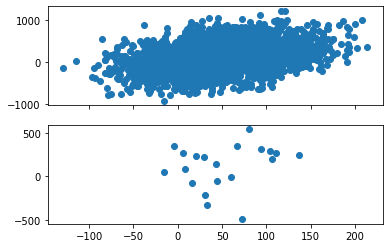

In [78]:
f, ax = plt.subplots(2,1, sharex=True)
ax[0].scatter(xs,ys)
ax[1].scatter(xs[:20],ys[:20])

## `fill_between`

We can fill areas of the plot with solid color

The syntax is 

```python
plt.fill_between(X, Y1, Y2)
```

Where Y1 and Y2 are either `np.array`s or scalar values.

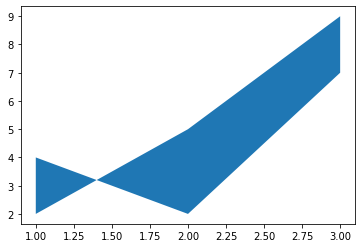

In [84]:
plt.fill_between([1,2,3], [4,2,7], [2,5,9])

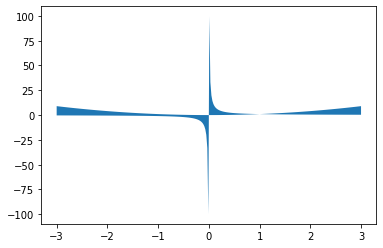

In [85]:
xs = np.linspace(-3, 3, 300)

plt.fill_between(xs, xs ** 2, 1 / xs)

#### Exercise:
Given this code:
```python
n = 256
X = np.linspace(-np.pi,np.pi,n,endpoint=True)
Y = np.sin(2*X)

plt.plot (X, Y+1, color='blue', alpha=1.00)
plt.plot (X, Y-1, color='blue', alpha=1.00)
plt.show()
```

Reproduce this plot:

![Exercise](figs/plot_ex.png)



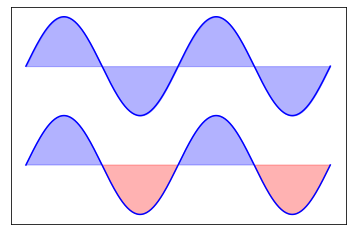

In [82]:
n = 256
X = np.linspace(-np.pi,np.pi,n,endpoint=True)
Y = np.sin(2*X)

plt.plot (X, Y+1, color='blue', alpha=1.00)
plt.plot (X, Y-1, color='blue', alpha=1.00)
plt.fill_between(X, Y+1, 1, alpha=.3, color='blue')
plt.fill_between(X, Y-1, -1, alpha=.3, color='blue', where=Y-1 > -1)
plt.fill_between(X, Y-1, -1, alpha=.3, color='red', where=Y-1 < -1)
plt.xticks([])
plt.yticks([])
plt.savefig('sine_exercise.png')

## Line properties


### Color

See https://matplotlib.org/users/colormaps.html

![Colormaps](https://matplotlib.org/_images/grayscale_01_00.png)

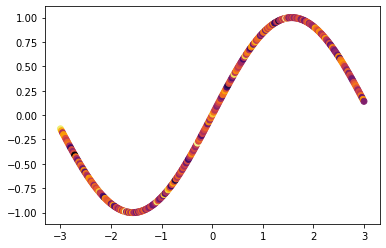

In [86]:
from matplotlib import cm

cmap = cm.get_cmap('inferno')
plt.scatter(xs, np.sin(xs), c=np.random.randn(len(xs)), cmap=cmap)

#### Exercise

Given this code, try to reproduce this graphic taking care of marker size, color and transparency.

```python
n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)

plt.scatter(X,Y)
plt.show()
```

![Color exercise](figs/scatter_ex.png)

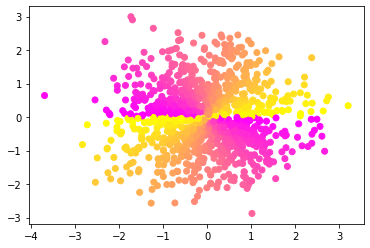

In [87]:
n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)
cmap = cm.get_cmap('spring')

plt.scatter(X,Y, c=np.arctan(X/Y), cmap=cmap)
plt.show()

### Markers and linestyles

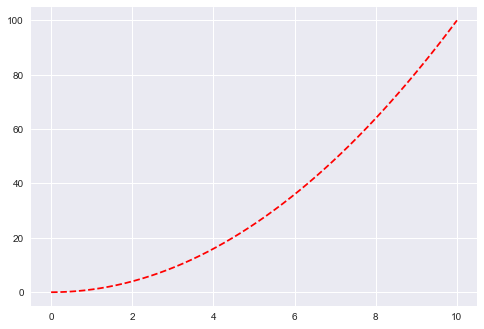

In [125]:
xs = np.linspace(0, 10)
ys = xs ** 2

plt.plot(xs, ys, 'r--')

## Other attributes

http://nbviewer.jupyter.org/github/WeatherGod/AnatomyOfMatplotlib/blob/master/AnatomyOfMatplotlib-Part3-HowToSpeakMPL.ipynb

### Histograms

(array([ 2.,  3.,  3.,  5.,  7., 15., 21., 28., 32., 45., 59., 83., 95.,
        95., 82., 79., 91., 57., 55., 52., 31., 25., 19., 17.,  9.,  7.,
         4.,  1.,  1.,  1.]),
 array([-3.0490859 , -2.83866766, -2.62824942, -2.41783117, -2.20741293,
        -1.99699469, -1.78657645, -1.57615821, -1.36573997, -1.15532172,
        -0.94490348, -0.73448524, -0.524067  , -0.31364876, -0.10323051,
         0.10718773,  0.31760597,  0.52802421,  0.73844245,  0.94886069,
         1.15927894,  1.36969718,  1.58011542,  1.79053366,  2.0009519 ,
         2.21137014,  2.42178839,  2.63220663,  2.84262487,  3.05304311,
         3.26346135]),
 <a list of 30 Patch objects>)

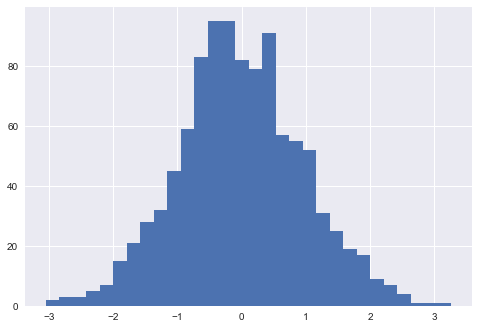

In [128]:
plt.hist(X, bins=30)

## Text and Math: $\LaTeX$

$\LaTeX$ is "a high-quality typesetting system; it includes features designed for the production of technical and scientific documentation. LaTeX is the de facto standard for the communication and publication of scientific documents" ([$LaTeX$ project website](https://www.latex-project.org/)).

It's widely used for writing mathematical equations that need to be rendered accurately.

We can use it in pretty much any place we need to use text.

$$\mu = \frac{\sum_{i=1}^nx_i}{n}$$

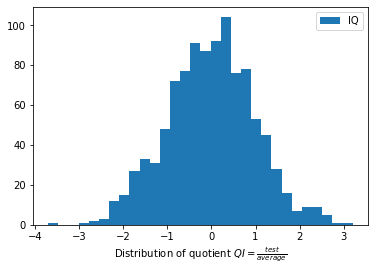

In [88]:
plt.hist(X, bins=30, label='IQ')
plt.xlabel(r'Distribution of quotient $QI=\frac{test}{average}$')
plt.legend()

## Ticks, tick labels, limits

### Ticks

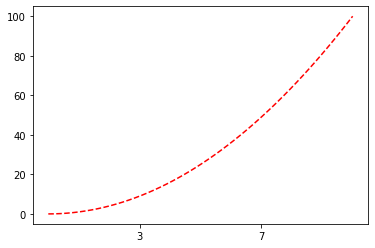

In [89]:
xs = np.linspace(0, 10)
ys = xs ** 2

plt.plot(xs, ys, 'r--')
ax = plt.gca()
ax.set_xticks([3,7]);

### Tick labels

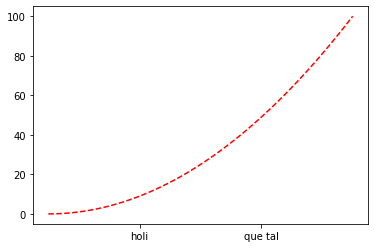

In [90]:
xs = np.linspace(0, 10)
ys = xs ** 2

plt.plot(xs, ys, 'r--')
ax = plt.gca()
ax.set_xticks([3,7]);
ax.set_xticklabels(['holi','que tal']);

### Limits

(20, 60)

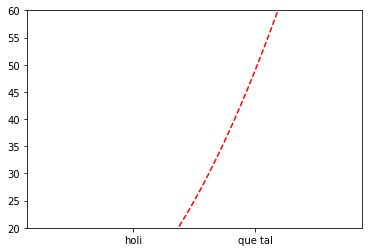

In [91]:
xs = np.linspace(0, 10)
ys = xs ** 2

plt.plot(xs, ys, 'r--')
ax = plt.gca()
ax.set_xticks([3,7]);
ax.set_xticklabels(['holi','que tal']);
ax.set_ylim(20, 60)

# Seaborn

Seaborn is a statistical data visualization library. It's built on top of matplotlib and tries to "make a well-defined set of hard things easy" ([introduction to Seaborn](http://seaborn.pydata.org/introduction.html)).

One advantage over matplotlib is that it works natively with DataFrame objects.


https://www.datacamp.com/community/tutorials/seaborn-python-tutorial



#### Exercise:

Load the `houses.csv` file into memory as a pandas `DataFrame`. Inspect its head. Clean the column names.

## Seaborn vs matplotlib



## Distribution plots

https://seaborn.pydata.org/tutorial/distributions.html

### Scatter plots

### Histogram

More on [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html)

### Pairwise relationships

## Linear relationships

https://seaborn.pydata.org/tutorial/regression.html

### `lmplot()`

## Categorical data

https://www.kaggle.com/c/titanic/download/train.csv

https://seaborn.pydata.org/tutorial/categorical.html

### Swarm plot

### Boxplot

### Barplot / countplot

### Pointplot

## Other types

### Heatmap

### Clustermap

# Bokeh

Bokeh "is a Python interactive visualization library that targets
modern web browsers for presentation". 

Two components: A Python backend and a JS frontend. 

The way we use it is to declare our graphs in Python. 

The Python objects will in turn generate a series of JSON objects that describe a _scenegraph_. The JS component will generate the actual visualization from that scenegraph. The upside of this is that we don't need to work with JS, but our visualizations will be browser-based and interactive

https://bokeh.pydata.org/en/latest/docs/gallery.html

https://bokeh.pydata.org/en/latest/

# Plotly

https://www.analyticsvidhya.com/blog/2017/01/beginners-guide-to-create-beautiful-interactive-data-visualizations-using-plotly-in-r-and-python/

Plotly is a multi-language tool for creating interactive visualizations. It's built on top  of D3.

## Dash

"Shiny for Python" 


# See Also: Vega

http://vega.github.io/

# Additional references

[Matplotlib documentation](http://matplotlib.org/contents.html)

[The matplotlib FAQ](http://matplotlib.org/faq/usage_faq.html)

[Matplotlib cheat sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf)

[Nicolas P. Rougier's matplotlib tutorial](http://www.labri.fr/perso/nrougier/teaching/matplotlib/)

[Anatomy of Matplotlib](https://github.com/matplotlib/AnatomyOfMatplotlib)

[$\LaTeX$](https://www.latex-project.org/)

# Additional references

[Bokeh User Guide](http://bokeh.pydata.org/en/latest/docs/user_guide.html)

[Bokeh Tutorials](http://nbviewer.jupyter.org/github/bokeh/bokeh-notebooks/blob/master/index.ipynb)

[Dash](https://plot.ly/dash/)

[Dash being spotted before release](https://www.reddit.com/r/Python/comments/6imhxa/plotly_has_just_released_dash_20_a_shinylike_tool/)

[Facets](https://pair-code.github.io/facets/)

[Facets release Google research blog entry](https://research.googleblog.com/2017/07/facets-open-source-visualization-tool.html)